# Support Vector Machine (SVM) Algorithm

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks.

### What is a Support Vector Machine(SVM)?

It is a supervised machine learning problem where we try to find a hyperplane that best separates the two classes. 

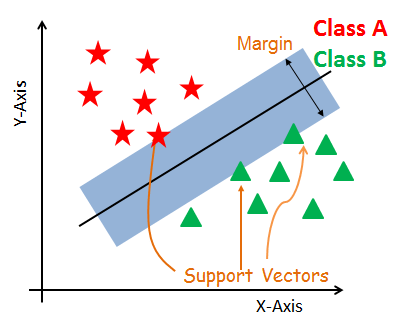

**Note:** Don’t get confused between `SVM` and `Logistic Regression`. Both the algorithms try to find the best hyperplane, but the main difference is `logistic regression` is a `probabilistic approach` whereas `support vector machine` is based on `statistical approaches`.

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)

Now, the question is which hyperplane does `SVM` select? There can be an infinite number of hyperplanes passing through a point and classifying the two classes perfectly. So, which one is the best?

Well, SVM does this by finding the `maximum margin` between the hyperplanes that means `maximum distances` between the `two classes`.

### Types of Support Vector Machines

Support vector machines are broadly classified into two types: simple or linear SVM and kernel or non-linear SVM.

1. Simple or linear SVM

A linear SVM refers to the SVM type used for classifying linearly separable data. This implies that when a dataset can be segregated into categories or classes with the help of a single straight line, it is termed a linear SVM, and the data is referred to as linearly distinct or separable. Moreover, the classifier that classifies such data is termed a linear SVM classifier.

A simple SVM is typically used to address classification and regression analysis problems.

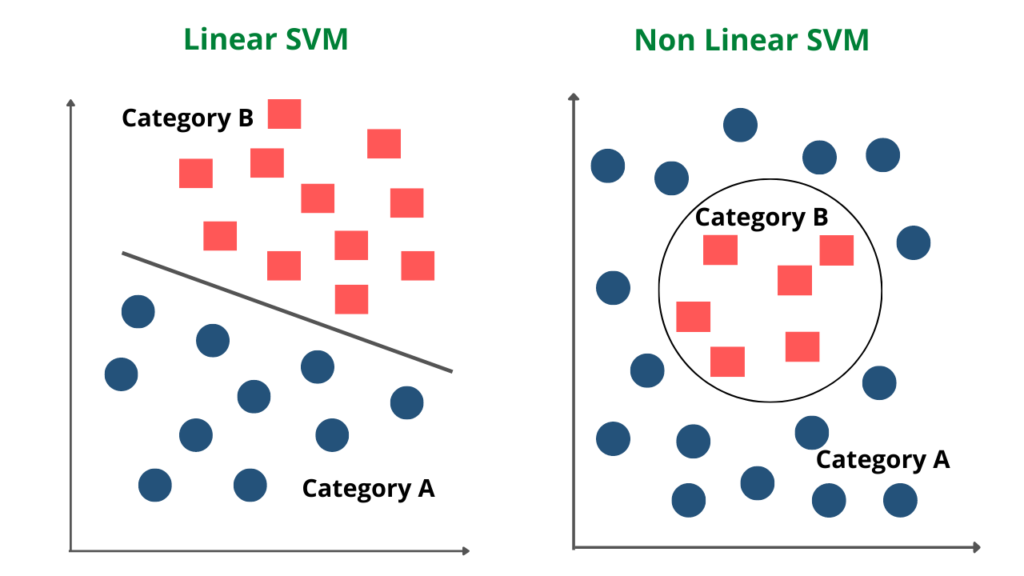

2. Kernel or non-linear SVM

Non-linear data that cannot be segregated into distinct categories with the help of a straight line is classified using a kernel or non-linear SVM. Here, the classifier is referred to as a non-linear classifier. The classification can be performed with a non-linear data type by adding features into higher dimensions rather than relying on 2D space. 

Kernel SVMs are typically used to handle optimization problems that have multiple variables.

### Problem Statement:
Predict next-day rain by training classification models on the target variable RainTomorrow.

We can read the data back preprocessed datasets for training, validation, and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors

In [1]:
import pandas as pd

In [2]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')["RainTomorrow"]
val_targets = pd.read_parquet('val_targets.parquet')["RainTomorrow"]
test_targets = pd.read_parquet('test_targets.parquet')["RainTomorrow"]

In [3]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9788, 123)
train_targets: (9788,)
val_inputs: (1700, 123)
val_targets: (1700,)
test_inputs: (2591, 123)
test_targets: (2591,)


## Training the Model using SVM

Now let’s define two main terms which will be repeated again and again in this article:

- **Support Vectors:** These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
- **Margin:** it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins **hard margin** and **soft margin.

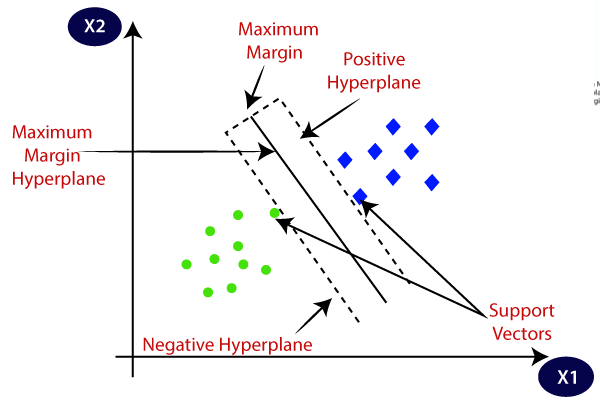

### Splitting data

In [4]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
126989,Walpole,0.437824,0.397959,0.031655,0.094322,0.534317,NW,0.190909,WNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40299,Williamtown,0.694301,0.932653,0.000000,0.168966,0.895105,WNW,0.427273,NNW,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28288,Richmond,0.634715,0.618367,0.000000,0.094322,0.534317,NNE,0.136364,None,NE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
134636,Launceston,0.287565,0.314286,0.021103,0.094322,0.534317,SSW,0.054545,None,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
130983,Hobart,0.297927,0.467347,0.000000,0.048276,0.272727,NW,0.390909,NNW,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,Tuggeranong,0.147668,0.373469,0.000000,0.094322,0.534317,W,0.209091,NW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
122446,Perth,0.461140,0.483673,0.000000,0.058621,0.223776,N,0.236364,N,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49288,Tuggeranong,0.386010,0.455102,0.002878,0.094322,0.534317,NNW,0.327273,NNW,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119280,PerthAirport,0.440415,0.538776,0.000000,0.082759,0.699301,NW,0.290909,NNE,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
import numpy as np

In [6]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.to_list()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [7]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [8]:
X_val

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
23480,0.595855,0.504082,0.000959,0.082759,0.517483,0.254545,0.292308,0.197368,0.666667,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77238,0.461140,0.412245,0.004796,0.003448,0.391608,0.290909,0.261538,0.263158,0.989583,0.757576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20541,0.712435,0.867347,0.000000,0.094322,0.534317,0.572727,0.461538,0.118421,0.468750,0.111111,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
57419,0.251295,0.226531,0.000000,0.094322,0.534317,0.218182,0.338462,0.289474,0.791667,0.757576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44800,0.567358,0.459184,0.254197,0.094322,0.534317,0.236364,0.200000,0.289474,0.927083,0.828283,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.321244,0.365306,0.000959,0.094322,0.534317,0.118182,0.000000,0.223684,1.000000,0.737374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5429,0.466321,0.673469,0.000000,0.094322,0.534317,0.154545,0.030769,0.144737,1.000000,0.383838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83338,0.256477,0.381633,0.000000,0.031034,0.363636,0.327273,0.061538,0.263158,0.677039,0.510673,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72707,0.305699,0.371429,0.006715,0.096552,0.076923,0.372727,0.138462,0.223684,0.739583,0.939394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
80721,0.411917,0.351020,0.016307,0.037931,0.013986,0.327273,0.261538,0.263158,0.958333,0.636364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
83947,0.318653,0.373469,0.010552,0.094322,0.534317,0.136364,0.061538,0.092105,0.979167,0.767677,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23750,0.588083,0.448980,0.000000,0.094322,0.534317,0.472727,0.430769,0.407895,0.562500,0.575758,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89908,0.665803,0.595918,0.000000,0.296552,0.534317,0.390909,0.476923,0.315789,0.666667,0.555556,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93275,0.541451,0.528571,0.000000,0.094322,0.534317,0.254545,0.200000,0.368421,0.645833,0.686869,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143525,0.510363,0.728571,0.000000,0.120690,0.534317,0.209091,0.200000,0.197368,0.552083,0.510673,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93147,0.823834,0.708163,0.000000,0.094322,0.534317,0.509091,0.400000,0.605263,0.635417,0.777778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
120606,0.388601,0.524490,0.000000,0.034483,0.657343,0.190909,0.169231,0.197368,0.750000,0.404040,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
39511,0.142487,0.277551,0.000000,0.031034,0.534317,0.190909,0.138462,0.118421,0.916667,0.858586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Training 

We can use `SVC` i.e. Support Vector Classifier from `sklearn.svm` to train the model.

In [10]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, train_targets)

SVC(C=1, kernel='linear', random_state=42)

### Evaluation

Let's evaluate the svm model using the accuracy score.

In [11]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [12]:
# returns the count of unique values in the `train_preds` variable.
# It creates a pandas Series object where the unique values in `train_preds` are the index and the corresponding counts are the values.
pd.value_counts(train_preds)

No     8355
Yes    1433
dtype: int64

Let's check the accuracy of the model on train dataset.

In [13]:
accuracy_score(train_targets, train_preds)

0.8522680833673887

We must evaluate the model on the validation set too. For better evaluation of model on both `train` and `val` datasets.

We can make predictions and compute accuracy in one step using `model.score`

In [14]:
model.score(X_val, val_targets)

0.8570588235294118

The two datasets exhibit only a marginal variance in accuracy scores, indicating that the `SVM model` effectively mitigates overfitting. 

Moreover, it is noteworthy that our validation accuracy, which stands at 85.70%, surpasses the validation accuracy achieved by the Decision Tree model, which was 80.58%. Indicating SVM to be the better model for classification problem.

### Feature Importance

Let's check the "importance" value to each feature using `coef_`. These coefficients represent the weights assigned to each feature in the model. 

Unlike Decision tress here we don't have `feature_importances_` which, assigns an "importance" value to each feature a decision tree based on the gini index computations. 

In [15]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [16]:
# `model.coef_` is accessing the coefficients of the model.
model.coef_

array([[-6.01311514e-01, -1.33426495e+00,  1.98016095e+00,
         3.86251921e-01, -9.92488084e-01,  3.65552032e+00,
        -2.70152457e-01, -6.37454141e-01,  7.20832516e-02,
         4.22964057e+00,  2.38700417e+00, -4.12601734e+00,
        -2.57854935e-01,  6.67842897e-01,  4.10523942e-01,
         1.25362572e+00,  5.59176500e-01, -1.83128511e-01,
         2.31610610e-01,  2.87856443e-01,  1.67087209e-01,
        -3.15794010e-01,  5.58962105e-02,  3.30145899e-01,
        -2.23607708e-02, -7.02227244e-03,  2.68326341e-01,
        -1.46184004e-01, -1.21823356e-01,  1.50699232e-01,
        -1.31587746e-01, -6.25676314e-01, -4.96366416e-02,
        -2.74959276e-01, -2.20701663e-01, -5.99832920e-01,
         2.60105101e-01,  1.40151050e-01, -1.00558933e-01,
        -7.83659631e-01, -1.63518546e-01,  1.46066479e-01,
        -5.32696772e-01, -2.63801291e-01,  4.28920959e-02,
         2.35477157e-01,  2.45155839e-01,  4.87108535e-01,
         3.24255010e-01, -7.24245537e-02,  3.21842953e-0

In [17]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.coef_[0]
}).sort_values('importance', ascending=False)

In [18]:
importance_df

,feature,importance
9,Humidity3pm,4.229641
5,WindGustSpeed,3.655520
10,Pressure9am,2.387004
2,Rainfall,1.980161
15,Temp3pm,1.253626
...,...,...
7,WindSpeed3pm,-0.637454
39,Location_MountGinini,-0.783660
4,Sunshine,-0.992488
1,MaxTemp,-1.334265


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

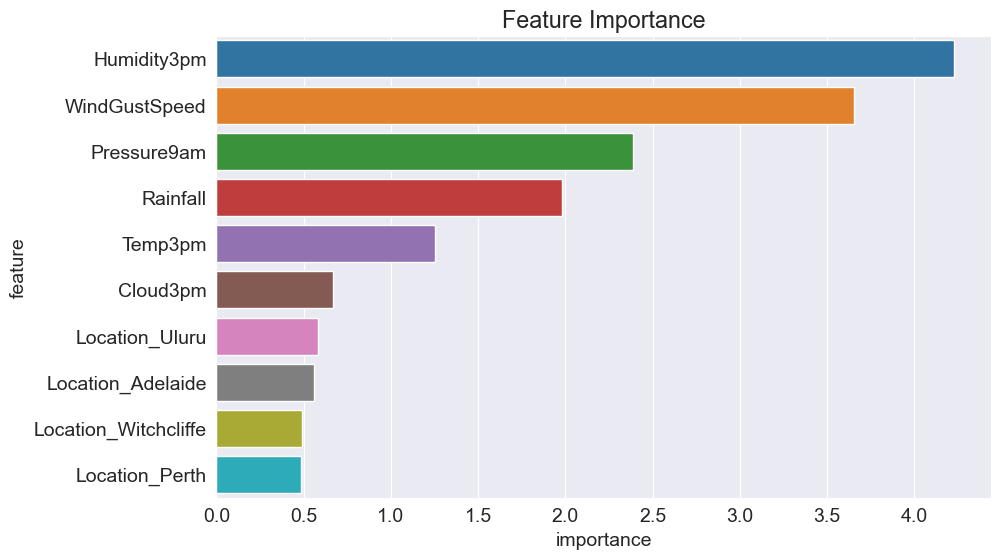

In [20]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with SVM Model

Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [21]:
def test_params(**params):
    model = SVC(kernel='linear', random_state=42, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `C`. 

The C hyperparameter tells the SVM optimization how much you want to avoid misclassifying each training sample. 
* For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 
* Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 
* For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

In [22]:
test_params(C = 10)

(0.8527789129546384, 0.8605882352941177)

In [23]:
test_params(C = 100)

(0.8527789129546384, 0.8605882352941177)

The optimal value for the hyperparameter `C` is identified as 10, as it contributes to an increased accuracy of the model. Furthermore, at `C` = 100, the accuracy remains consistent without improvement.

### HyperTuning Kernel

#### Q. What is Kernel Trick ?

The “Kernel Trick” is a method used in Support Vector Machines (SVMs) to convert data (that is not linearly separable) into a higher-dimensional feature space where it may be linearly separated.

This technique enables the SVM to identify a hyperplane that separates the data with the maximum margin, even when the data is not linearly separable in its original space.

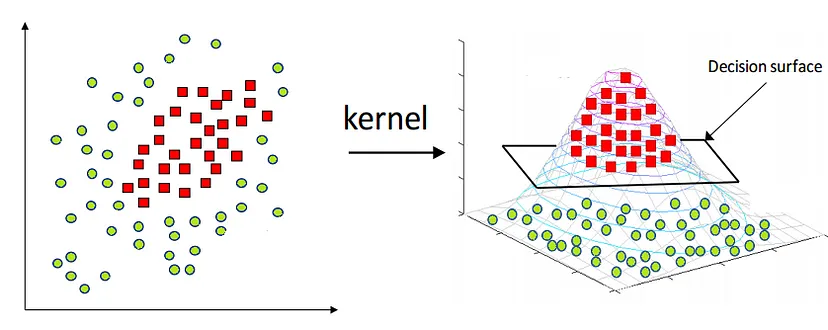

The most widely used kernels in SVM are the linear kernel, polynomial kernel, and Gaussian (radial basis function) kernel. The choice of kernel relies on the nature of the data and the job at hand. 
* The linear kernel is used when the data is roughly linearly separable, whereas the polynomial kernel is used when the data has a complicated curved border. 
* The Gaussian kernel is employed when the data has no clear boundaries and contains complicated areas of overlap.

Let's change the values of `kernel`

In [24]:
def test_params(**params):
    model = SVC(random_state=42, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [25]:
test_params(kernel="poly", C = 10)

(0.9703718839395178, 0.8252941176470588)

In [26]:
test_params(kernel="rbf", C = 10)

(0.9597466285247241, 0.841764705882353)

In [27]:
model =  SVC(kernel='rbf', random_state=42, C = 10)
model.fit(X_train, train_targets)

SVC(C=10, random_state=42)

In [28]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9597466285247241, 0.841764705882353)

In [29]:
model.score(X_test, test_targets)

0.8186028560401389

I believe our data is roughly linearly separable with better accuracy on train, validation and test datasets. Hence let's use the `linear kernel` for model building.

### Putting it together

Let's train a svm with customized hyperparameters based on our learnings.

In [30]:
model =  SVC(kernel='linear', random_state=42, C = 10)
model.fit(X_train, train_targets)

SVC(C=10, kernel='linear', random_state=42)

In [31]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8527789129546384, 0.8605882352941177)

Finally, let's also compute the accuracy of our model on the test dataset.

In [32]:
model.score(X_test, test_targets)

0.8317252026244694

This accuracy is better than the test accuracy of Logistic Regession as well as Random Forest Model.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it.

We can use the `pickle` module to save and load Python objects on the disk. 

In [33]:
import pickle

In [35]:
pickle.dump(model, open("svm_model.pkl", "wb"))

The object can be loaded back using `pickle.load`

Let's use the loaded model to make predictions on the original test set.

In [36]:
# load the model from disk
loaded_model = pickle.load(open("svm_model.pkl", 'rb'))
result = loaded_model.score(X_test, test_targets)
result

0.8317252026244694

As expected, we get the same result as the original model.

## Summary and References

The following topics were covered in this project:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors
* Training and interpreting SVM
* Overfitting & hyperparameter tuning
* Making predictions on test
* Saving model on disk

## Support Vector Machine Terminology

* Hyperplane: Hyperplane is the decision boundary that is used to separate the data points of different classes in a feature space. In the case of linear classifications, it will be a linear equation i.e. wx+b = 0.
* Support Vectors: Support vectors are the closest data points to the hyperplane, which makes a critical role in deciding the hyperplane and margin. 
* Margin: Margin is the distance between the support vector and hyperplane. The main objective of the support vector machine algorithm is to maximize the margin.  The wider margin indicates better classification performance.
* Kernel: Kernel is the mathematical function, which is used in SVM to map the original input data points into high-dimensional feature spaces, so, that the hyperplane can be easily found out even if the data points are not linearly separable in the original input space. Some of the common kernel functions are linear, polynomial, radial basis function(RBF), and sigmoid.
* Hard Margin: The maximum-margin hyperplane or the hard margin hyperplane is a hyperplane that properly separates the data points of different categories without any misclassifications.
* Soft Margin: When the data is not perfectly separable or contains outliers, SVM permits a soft margin technique. Each data point has a slack variable introduced by the soft-margin SVM formulation, which softens the strict margin requirement and permits certain misclassifications or violations. It discovers a compromise between increasing the margin and reducing violations.
* C: Margin maximisation and misclassification fines are balanced by the regularisation parameter C in SVM. The penalty for going over the margin or misclassifying data items is decided by it. A stricter penalty is imposed with a greater value of C, which results in a smaller margin and perhaps fewer misclassifications.
* Hinge Loss: A typical loss function in SVMs is hinge loss. It punishes incorrect classifications or margin violations. The objective function in SVM is frequently formed by combining it with the regularisation term.
* Dual Problem: A dual Problem of the optimisation problem that requires locating the Lagrange multipliers related to the support vectors can be used to solve SVM. The dual formulation enables the use of kernel tricks and more effective computing.